In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_excel('C:/Users/S/Desktop/Depression & Anxiety Facebook page Comments Text.xlsx')

import textblob
from textblob import TextBlob

sentiments = []

for i in range(7145):
    comment = TextBlob(dataset['Comments Text'][i])
    polarity, subjectivity = comment.sentiment
    sentiment = np.mean([polarity, subjectivity])
    sentiments.append(polarity)

labels = list(range(7145))

for i in range(7145):
    if (sentiments[i] > 0):
        labels[i] = 'Yes'
    else:
        labels[i] = 'No'

print(labels.count('Yes'))
print(labels.count('No'))

3809
3336


In [2]:
emotion_dataset = pd.read_excel('C:/Users/S/Desktop/dissertation/emotional.xlsx')
emotion_dataset['label'] = labels

X = emotion_dataset.iloc[:, 1:7]
y = emotion_dataset.iloc[:, -1]

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
y = lab.fit_transform(y)
lab.classes_

array(['No', 'Yes'], dtype=object)

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score,f1_score

dt =  DecisionTreeClassifier()

from sklearn.ensemble import AdaBoostClassifier
bt = AdaBoostClassifier(base_estimator = dt)
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
            'f1' : 'f1'}
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)            

cross_val_scores = cross_validate(bt, X, y, cv=cv, scoring=scoring) 
print(cross_val_scores)

cross_val_scores['test_precision'].mean()


{'fit_time': array([2.332798  , 1.48871613, 1.53014112, 2.12528419, 1.7101109 ,
       1.96287322, 1.90074158, 1.63537216, 1.78061104, 1.62906075]), 'score_time': array([0.20332265, 0.28083825, 0.24184394, 0.27783966, 0.36317062,
       0.23670053, 0.23128581, 0.25978398, 0.20088339, 0.20660734]), 'test_accuracy': array([0.68703358, 0.67350746, 0.68610075, 0.67210821, 0.6795709 ,
       0.67817164, 0.68703358, 0.68516791, 0.66464552, 0.67910448]), 'test_recall': array([0.71136767, 0.66952055, 0.70008569, 0.68855368, 0.70502984,
       0.70714286, 0.72758921, 0.70770593, 0.67161572, 0.69128114]), 'test_precision': array([0.6983435 , 0.71350365, 0.71666667, 0.68794326, 0.70804795,
       0.68630849, 0.7001675 , 0.69842657, 0.69154676, 0.69499106]), 'test_f1': array([0.70479542, 0.69081272, 0.70827915, 0.68824834, 0.70653567,
       0.69656992, 0.71361502, 0.70303564, 0.68143553, 0.69313113])}


0.6995945416574967

In [4]:
cross_val_scores['test_recall'].mean()

0.6979892290211326

In [5]:
cross_val_scores['test_f1'].mean()

0.698645854820926

In [6]:
acc1=cross_val_scores['test_accuracy'].mean()
acc1

0.6792444029850746

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

complex_dt = ExtraTreesClassifier(n_estimators=100, bootstrap=True, oob_score=True, )
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
            'f1' : 'f1'}
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)            

cross_val_scores = cross_validate(complex_dt, X, y, cv=cv, scoring=scoring) 
print(cross_val_scores)

cross_val_scores['test_precision'].mean()


{'fit_time': array([0.89215946, 0.865412  , 0.8741107 , 0.81763291, 0.832376  ,
       1.08566093, 1.58073545, 1.39320087, 1.16521025, 1.31224775]), 'score_time': array([0.45352983, 0.4228313 , 0.47472906, 0.49094439, 0.50271249,
       0.46182394, 0.74652719, 0.73557973, 0.77155542, 0.72444367]), 'test_accuracy': array([0.73134328, 0.71735075, 0.70988806, 0.72014925, 0.69589552,
       0.69822761, 0.70335821, 0.70755597, 0.69356343, 0.7136194 ]), 'test_recall': array([0.75843694, 0.73544521, 0.71722365, 0.74356699, 0.71696505,
       0.74553571, 0.7232376 , 0.73782108, 0.72663755, 0.73754448]), 'test_precision': array([0.73747841, 0.74307958, 0.74136404, 0.72932985, 0.72437554,
       0.69757728, 0.7232376 , 0.71563574, 0.70748299, 0.72212544]), 'test_f1': array([0.74781086, 0.73924269, 0.72909408, 0.73637961, 0.72065124,
       0.7207596 , 0.7232376 , 0.72655909, 0.71693236, 0.72975352])}


0.7241686467180288

In [8]:
cross_val_scores['test_recall'].mean()

0.7342414271075569

In [9]:
cross_val_scores['test_f1'].mean()

0.7290420647290395

In [10]:
acc2=cross_val_scores['test_accuracy'].mean()
acc2

0.7090951492537313

In [11]:
from sklearn.ensemble import RandomForestClassifier

rd=RandomForestClassifier(n_estimators=500, max_depth=None)
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
            'f1' : 'f1'}
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)            

cross_val_scores = cross_validate(rd, X, y, cv=cv, scoring=scoring) 
print(cross_val_scores)

cross_val_scores['test_precision'].mean()

{'fit_time': array([6.57414937, 6.29152465, 5.89212203, 6.17588496, 5.9960165 ,
       6.05025125, 6.06767702, 6.0518415 , 5.94239092, 6.09551716]), 'score_time': array([1.91429162, 1.88422465, 1.87774754, 1.99821091, 1.85016584,
       1.83302212, 1.83504653, 1.89814568, 1.86625195, 1.95357847]), 'test_accuracy': array([0.71968284, 0.71128731, 0.70335821, 0.70988806, 0.70335821,
       0.69589552, 0.70615672, 0.69682836, 0.69123134, 0.70429104]), 'test_recall': array([0.74777975, 0.71832192, 0.70522708, 0.73025732, 0.71952259,
       0.72857143, 0.72671889, 0.71833481, 0.72139738, 0.71619217]), 'test_precision': array([0.72648835, 0.74313552, 0.73811659, 0.72129711, 0.73327541,
       0.70103093, 0.72545613, 0.70953631, 0.70658683, 0.71875   ]), 'test_f1': array([0.73698031, 0.73051807, 0.72129711, 0.72574956, 0.72633391,
       0.7145359 , 0.72608696, 0.71390845, 0.7139153 , 0.71746881])}


0.7223673169850782

In [12]:
cross_val_scores['test_recall'].mean()

0.7232323333939277

In [13]:
cross_val_scores['test_f1'].mean()

0.722679436037104

In [14]:
acc3=cross_val_scores['test_accuracy'].mean()
acc3

0.7041977611940299

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
rub = GradientBoostingClassifier()
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
            'f1' : 'f1'}
cv = ShuffleSplit(n_splits=10, test_size=0.3,random_state=0 )            

cross_val_scores = cross_validate(rub, X, y, cv=cv, scoring=scoring) 
print(cross_val_scores)

cross_val_scores['test_precision'].mean()

{'fit_time': array([0.62220788, 0.93946052, 0.86187434, 0.84351707, 0.93446159,
       0.96944714, 0.7709291 , 0.6406312 , 0.75856209, 0.68610191]), 'score_time': array([0.05496645, 0.0629642 , 0.09994197, 0.063977  , 0.05197001,
       0.03997374, 0.0779531 , 0.04197621, 0.10194159, 0.10294127]), 'test_accuracy': array([0.73320896, 0.73087687, 0.73320896, 0.72901119, 0.72621269,
       0.72201493, 0.73740672, 0.72154851, 0.71035448, 0.72014925]), 'test_recall': array([0.78330373, 0.75684932, 0.75064267, 0.76486247, 0.7826087 ,
       0.77232143, 0.76240209, 0.75907883, 0.74672489, 0.76245552]), 'test_precision': array([0.72892562, 0.75106202, 0.75713051, 0.73174873, 0.7344    ,
       0.7172471 , 0.75128645, 0.7250423 , 0.72091062, 0.72016807]), 'test_f1': array([0.75513699, 0.75394456, 0.75387263, 0.74793926, 0.75773834,
       0.74376612, 0.75680346, 0.74167027, 0.73359073, 0.74070873])}


0.7337921418120747

In [16]:
cross_val_scores['test_recall'].mean()

0.7641249635998043

In [17]:
cross_val_scores['test_f1'].mean()

0.7485171099458791

In [18]:
acc4=cross_val_scores['test_accuracy'].mean()
acc4

0.7263992537313434

In [19]:
########### Part 2 Creating the dataset for Linguistic Style #################

linguistic_dataset = pd.read_excel('C:/Users/S/Desktop/dissertation/linguistic.xlsx')
linguistic_dataset['label'] = labels

X = linguistic_dataset.iloc[:, 2:15]
y = linguistic_dataset.iloc[:, -1]

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
y = lab.fit_transform(y)
lab.classes_


array(['No', 'Yes'], dtype=object)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score,f1_score

dt =  DecisionTreeClassifier()

from sklearn.ensemble import AdaBoostClassifier
bt = AdaBoostClassifier(base_estimator = dt)
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
            'f1' : 'f1'}
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)            

cal = cross_validate(bt, X, y, cv=cv, scoring=scoring) 
print(cal)

cal['test_precision'].mean()

{'fit_time': array([47.59205556,  2.97293735, 24.03566504,  9.21174431,  2.31033826,
       35.41236353, 16.74363136, 15.62671924, 34.4437592 , 22.00599146]), 'score_time': array([0.69172287, 0.25885129, 0.44474244, 0.29348469, 0.3318069 ,
       0.54685402, 0.40790129, 0.36086869, 0.60411763, 0.42289352]), 'test_accuracy': array([0.59095149, 0.57882463, 0.5858209 , 0.58722015, 0.57789179,
       0.59934701, 0.60214552, 0.60541045, 0.58535448, 0.59794776]), 'test_recall': array([0.65008881, 0.62243151, 0.64010283, 0.64596273, 0.58738278,
       0.65267857, 0.68233246, 0.67847653, 0.67074236, 0.66281139]), 'test_precision': array([0.60246914, 0.61143818, 0.61481481, 0.59967051, 0.62072072,
       0.60865945, 0.6163522 , 0.61329063, 0.6       , 0.60667752]), 'test_f1': array([0.62537377, 0.61688587, 0.62720403, 0.62195643, 0.60359177,
       0.6299009 , 0.64766625, 0.64423886, 0.63340206, 0.6335034 ])}


0.6094093174045543

In [21]:
cal['test_recall'].mean()

0.6493009964997057

In [22]:
cal['test_f1'].mean()

0.6283723345882335

In [23]:
acc5=cal['test_accuracy'].mean()
acc5

0.5910914179104477

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
complex_dt = ExtraTreesClassifier(n_estimators=100, bootstrap=True, oob_score=True, )
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
            'f1' : 'f1'}
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)            

cal1 = cross_validate(complex_dt, X, y, cv=cv, scoring=scoring) 
print(cal1)

cal1['test_precision'].mean()


{'fit_time': array([1.19648862, 1.05885959, 1.05322671, 1.03491306, 1.07455873,
       1.10772467, 1.04380202, 1.2125361 , 1.3327837 , 1.10018969]), 'score_time': array([0.48434162, 0.45675611, 0.45795512, 0.47370839, 0.49109721,
       0.42977285, 0.48911142, 0.49996543, 0.42102647, 0.49671793]), 'test_accuracy': array([0.61800373, 0.60960821, 0.63386194, 0.63572761, 0.62593284,
       0.63479478, 0.62126866, 0.62266791, 0.61427239, 0.61847015]), 'test_recall': array([0.74067496, 0.69606164, 0.72493573, 0.7515528 , 0.73998295,
       0.75714286, 0.72236728, 0.72187777, 0.730131  , 0.73309609]), 'test_precision': array([0.61278472, 0.62779923, 0.64580153, 0.62833828, 0.63589744,
       0.62398823, 0.62736206, 0.6221374 , 0.61742984, 0.61400894]), 'test_f1': array([0.67068758, 0.66017052, 0.68308438, 0.68444444, 0.68400315,
       0.68414683, 0.67152104, 0.66830668, 0.66906763, 0.66828873])}


0.6255547653012865

In [25]:
cal1['test_recall'].mean()

0.7317823067558362

In [26]:
cal1['test_f1'].mean()

0.6743720977737679

In [27]:
acc6=cal1['test_accuracy'].mean()
acc6

0.6234608208955225

In [28]:
from sklearn.ensemble import RandomForestClassifier

rd=RandomForestClassifier(n_estimators=500, max_depth=None)
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
            'f1' : 'f1'}
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)            

cal3= cross_validate(rd, X, y, cv=cv, scoring=scoring) 
print(cross_val_scores)

cal3['test_precision'].mean()

{'fit_time': array([0.62220788, 0.93946052, 0.86187434, 0.84351707, 0.93446159,
       0.96944714, 0.7709291 , 0.6406312 , 0.75856209, 0.68610191]), 'score_time': array([0.05496645, 0.0629642 , 0.09994197, 0.063977  , 0.05197001,
       0.03997374, 0.0779531 , 0.04197621, 0.10194159, 0.10294127]), 'test_accuracy': array([0.73320896, 0.73087687, 0.73320896, 0.72901119, 0.72621269,
       0.72201493, 0.73740672, 0.72154851, 0.71035448, 0.72014925]), 'test_recall': array([0.78330373, 0.75684932, 0.75064267, 0.76486247, 0.7826087 ,
       0.77232143, 0.76240209, 0.75907883, 0.74672489, 0.76245552]), 'test_precision': array([0.72892562, 0.75106202, 0.75713051, 0.73174873, 0.7344    ,
       0.7172471 , 0.75128645, 0.7250423 , 0.72091062, 0.72016807]), 'test_f1': array([0.75513699, 0.75394456, 0.75387263, 0.74793926, 0.75773834,
       0.74376612, 0.75680346, 0.74167027, 0.73359073, 0.74070873])}


0.627190347866409

In [29]:
cal3['test_recall'].mean()

0.7131282589100852

In [30]:
cal3['test_f1'].mean()

0.667233832062676

In [31]:
acc7=cal3['test_accuracy'].mean()
acc7

0.621035447761194

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
rub = GradientBoostingClassifier()
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
            'f1' : 'f1'}
cv = ShuffleSplit(n_splits=10, test_size=0.3,random_state=0 )            

cal4 = cross_validate(rub, X, y, cv=cv, scoring=scoring) 
print(cal4)

cal4['test_precision'].mean()

{'fit_time': array([0.85350823, 1.20675611, 0.89047074, 0.7877605 , 0.87890267,
       0.86086297, 0.74266005, 0.8164351 , 0.84656382, 0.78489113]), 'score_time': array([0.04497528, 0.0369978 , 0.09594679, 0.03124619, 0.04099202,
       0.04197526, 0.03126574, 0.06249666, 0.04687142, 0.04686904]), 'test_accuracy': array([0.62313433, 0.62126866, 0.64039179, 0.6380597 , 0.63199627,
       0.62966418, 0.64179104, 0.64132463, 0.62639925, 0.62266791]), 'test_recall': array([0.73801066, 0.72688356, 0.75064267, 0.76220053, 0.74595055,
       0.76785714, 0.7745866 , 0.74402126, 0.7371179 , 0.74199288]), 'test_precision': array([0.61830357, 0.63263785, 0.6460177 , 0.62838332, 0.64055637,
       0.6169297 , 0.63616869, 0.63636364, 0.62797619, 0.61640798]), 'test_f1': array([0.67287449, 0.67649402, 0.69441141, 0.68885325, 0.68924774,
       0.68416866, 0.69858713, 0.68599428, 0.67818401, 0.67339524])}


0.629974501432762

In [33]:
cal4['test_recall'].mean()

0.7489263763021535

In [34]:
cal4['test_f1'].mean()

0.684221022782103

In [35]:
acc8=cal4['test_accuracy'].mean()
acc8

0.6316697761194031

In [36]:
############# Part 3 Creating the Dataset for Temporal Process ###########################

temporal_dataset = pd.read_excel('C:/Users/S/Desktop/dissertation/temporal.xlsx')
temporal_dataset['label'] = labels

X = temporal_dataset.iloc[:, 1:4]
y = temporal_dataset.iloc[:, -1]

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
y = lab.fit_transform(y)
lab.classes_


array(['No', 'Yes'], dtype=object)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score,f1_score

dt =  DecisionTreeClassifier()

from sklearn.ensemble import AdaBoostClassifier
bt = AdaBoostClassifier(base_estimator = dt)
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
            'f1' : 'f1'}
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)            

cal5 = cross_validate(bt, X, y, cv=cv, scoring=scoring) 
print(cal5)

cal5['test_precision'].mean()

{'fit_time': array([0.97862697, 1.0522294 , 0.97865534, 1.11119533, 0.85781407,
       0.85923123, 0.65831518, 0.44665289, 1.24828005, 0.88584018]), 'score_time': array([0.19088984, 0.25285506, 0.21125579, 0.17689633, 0.17186046,
       0.16690803, 0.2656064 , 0.15189672, 0.29383111, 0.21687222]), 'test_accuracy': array([0.57742537, 0.56623134, 0.55690299, 0.56996269, 0.57835821,
       0.57509328, 0.57929104, 0.56669776, 0.57695896, 0.57835821]), 'test_recall': array([0.56838366, 0.58818493, 0.55698372, 0.56344277, 0.56180733,
       0.59107143, 0.57267189, 0.59255979, 0.58078603, 0.59341637]), 'test_precision': array([0.60377358, 0.60475352, 0.60018467, 0.59624413, 0.62821735,
       0.59372197, 0.61552853, 0.58787346, 0.60897436, 0.59874327]), 'test_f1': array([0.58554437, 0.59635417, 0.57777778, 0.57937956, 0.59315932,
       0.59239374, 0.59332732, 0.59020732, 0.59454627, 0.59606792])}


0.6038014852676787

In [38]:
cal5['test_recall'].mean()

0.5769307910354459

In [39]:
cal5['test_f1'].mean()

0.5898757761192523

In [40]:
acc9=cal5['test_accuracy'].mean()
acc9

0.5725279850746269

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

complex_dt = ExtraTreesClassifier(n_estimators=100, bootstrap=True, oob_score=True, )
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
            'f1' : 'f1'}
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)            

cal6 = cross_validate(complex_dt, X, y, cv=cv, scoring=scoring) 
print(cal6)

cal6['test_precision'].mean()


{'fit_time': array([1.05779314, 0.90949655, 0.80179906, 0.76956153, 0.8199122 ,
       0.75125718, 0.73666787, 1.12842464, 1.06963801, 0.84638643]), 'score_time': array([0.5706718 , 0.39059901, 0.37578464, 0.37497139, 0.39688087,
       0.47992373, 0.41409683, 0.53341556, 0.45309377, 0.50539374]), 'test_accuracy': array([0.59328358, 0.59608209, 0.58115672, 0.57602612, 0.59235075,
       0.58442164, 0.61567164, 0.59235075, 0.5886194 , 0.61287313]), 'test_recall': array([0.62966252, 0.64982877, 0.62039417, 0.61579414, 0.63171355,
       0.64553571, 0.67101828, 0.64924712, 0.63668122, 0.6752669 ]), 'test_precision': array([0.60910653, 0.62417763, 0.61407973, 0.59316239, 0.62637363,
       0.59408381, 0.63352506, 0.60528489, 0.61004184, 0.62009804]), 'test_f1': array([0.61921397, 0.63674497, 0.6172208 , 0.60426643, 0.62903226,
       0.61874198, 0.65173288, 0.62649573, 0.62307692, 0.64650767])}


0.6129933551930906

In [42]:
cal6['test_recall'].mean()

0.6425142400167297

In [43]:
cal6['test_f1'].mean()

0.6273033609217398

In [44]:
acc10=cal6['test_accuracy'].mean()
acc10

0.5932835820895523

In [45]:
from sklearn.ensemble import RandomForestClassifier

rd=RandomForestClassifier(n_estimators=500, max_depth=None)
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
            'f1' : 'f1'}
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)            

cal7 = cross_validate(rd, X, y, cv=cv, scoring=scoring) 
print(cal7)

cal7['test_precision'].mean()

{'fit_time': array([6.71134686, 6.55796623, 5.38137722, 5.7875669 , 5.44109893,
       5.65038133, 5.45678592, 5.45024586, 5.42976165, 5.60068154]), 'score_time': array([2.38230443, 2.23159122, 2.0998342 , 2.05739951, 2.06067371,
       1.94599605, 2.25961447, 2.13367987, 2.01167941, 2.01952219]), 'test_accuracy': array([0.59654851, 0.58255597, 0.57136194, 0.57182836, 0.58255597,
       0.58395522, 0.61940299, 0.5858209 , 0.58768657, 0.61054104]), 'test_recall': array([0.62433393, 0.61986301, 0.59040274, 0.60425909, 0.61210571,
       0.63392857, 0.67449956, 0.63330381, 0.62358079, 0.66459075]), 'test_precision': array([0.6139738 , 0.61617021, 0.60973451, 0.59063313, 0.62003454,
       0.59563758, 0.63681183, 0.60134567, 0.61182519, 0.61991701]), 'test_f1': array([0.61911052, 0.6180111 , 0.59991293, 0.59736842, 0.61604462,
       0.61418685, 0.65511412, 0.61691113, 0.61764706, 0.64147703])}


0.611608348859057

In [46]:
cal7['test_recall'].mean()

0.6280867966269221

In [47]:
cal7['test_f1'].mean()

0.6195783773628019

In [48]:
acc11=cal7['test_accuracy'].mean()
acc11

0.5892257462686568

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
rub = GradientBoostingClassifier()
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
            'f1' : 'f1'}
cv = ShuffleSplit(n_splits=10, test_size=0.3,random_state=0 )            

cal8 = cross_validate(rub, X, y, cv=cv, scoring=scoring) 
print(cal8)

cal8['test_precision'].mean()

{'fit_time': array([0.3198216 , 0.39028883, 0.41776395, 0.34372497, 0.36945891,
       0.39059448, 0.37551832, 0.33522391, 0.41315627, 0.36578608]), 'score_time': array([0.04687166, 0.04097295, 0.03123212, 0.04688931, 0.03123045,
       0.04687309, 0.03997731, 0.03125024, 0.03298044, 0.03398037]), 'test_accuracy': array([0.62266791, 0.61333955, 0.62826493, 0.61893657, 0.6170709 ,
       0.61800373, 0.63432836, 0.61147388, 0.62080224, 0.61054104]), 'test_recall': array([0.71580817, 0.69349315, 0.71208226, 0.71251109, 0.68371697,
       0.7       , 0.73629243, 0.68821966, 0.71703057, 0.70729537]), 'test_precision': array([0.62239382, 0.6323185 , 0.64318885, 0.61959877, 0.64057508,
       0.61878453, 0.63752826, 0.61764706, 0.62671756, 0.61106841]), 'test_f1': array([0.66584056, 0.66149449, 0.67588451, 0.66281469, 0.6614433 ,
       0.6568915 , 0.68336026, 0.65102639, 0.6688391 , 0.6556701 ])}


0.6269820837967995

In [50]:
cal8['test_recall'].mean()

0.7066449672819252

In [51]:
cal8['test_f1'].mean()

0.6643264900699888

In [52]:
acc12=cal8['test_accuracy'].mean()
acc12


0.6195429104477612

In [53]:
############## Part 4 Considering all the factors ##############

master_dataset = pd.read_excel('C:/Users/S/Desktop/dissertation/original.xlsx')
master_dataset['label'] = labels

X = master_dataset.iloc[:, 1:23]
y = master_dataset.iloc[:, -1]

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
y = lab.fit_transform(y)
lab.classes_


array(['No', 'Yes'], dtype=object)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score,f1_score

dt =  DecisionTreeClassifier()

from sklearn.ensemble import AdaBoostClassifier
bt = AdaBoostClassifier(base_estimator = dt)
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
            'f1' : 'f1'}
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)            

cal9 = cross_validate(bt, X, y, cv=cv, scoring=scoring) 
print(cal9)

cal9['test_precision'].mean()

{'fit_time': array([5.56241989e-01, 2.41860151e-01, 1.84345480e+02, 1.77899837e-01,
       1.98082414e+02, 1.87468052e-01, 1.88120586e+02, 1.90794092e+02,
       1.91893153e+02, 1.86980048e+02]), 'score_time': array([0.0229876 , 0.03697944, 1.42433333, 0.0229845 , 1.48498034,
       0.03124976, 1.49859595, 1.56262159, 1.43593073, 1.77654672]), 'test_accuracy': array([0.64785448, 0.61753731, 0.59934701, 0.63759328, 0.60541045,
       0.62733209, 0.60727612, 0.58162313, 0.57462687, 0.59654851]), 'test_recall': array([0.69271758, 0.63441781, 0.61182519, 0.65217391, 0.63853367,
       0.64285714, 0.63533507, 0.59787422, 0.58340611, 0.62900356]), 'test_precision': array([0.65601346, 0.65343915, 0.6375    , 0.65625   , 0.63962425,
       0.64343164, 0.63313096, 0.60375671, 0.60562103, 0.61212121]), 'test_f1': array([0.67386609, 0.64378801, 0.62439878, 0.65420561, 0.6390785 ,
       0.64314426, 0.6342311 , 0.60080107, 0.59430605, 0.62044756])}


0.6340888415069535

In [55]:
cal9['test_recall'].mean()

0.6318144286841814

In [56]:
cal9['test_f1'].mean()

0.6328267029450593

In [57]:
acc13=cal9['test_accuracy'].mean()
acc13

0.6095149253731342

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

complex_dt = ExtraTreesClassifier(n_estimators=100, bootstrap=True, oob_score=True, )
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
            'f1' : 'f1'}
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)            

cal10= cross_validate(complex_dt, X, y, cv=cv, scoring=scoring) 
print(cal10)

cal10['test_precision'].mean()


{'fit_time': array([1.60402226, 1.04283404, 1.1037066 , 1.12371492, 1.42234802,
       1.20191455, 1.12082791, 1.08608961, 1.13473964, 1.19863844]), 'score_time': array([0.49185538, 0.44205785, 0.41432977, 0.53917408, 0.44834375,
       0.40620232, 0.51556921, 0.42902517, 0.45331001, 0.51379085]), 'test_accuracy': array([0.72061567, 0.7056903 , 0.71501866, 0.71968284, 0.71735075,
       0.71315299, 0.70988806, 0.70475746, 0.69589552, 0.7005597 ]), 'test_recall': array([0.70159858, 0.69349315, 0.6966581 , 0.70629991, 0.71355499,
       0.71785714, 0.70147955, 0.68379097, 0.68471616, 0.69928826]), 'test_precision': array([0.75023742, 0.74792244, 0.75981308, 0.7467167 , 0.75609756,
       0.72892112, 0.74285714, 0.73664122, 0.72930233, 0.72110092]), 'test_f1': array([0.72510326, 0.71968014, 0.72686634, 0.72594619, 0.73421053,
       0.72334683, 0.72157565, 0.70923289, 0.70630631, 0.7100271 ])}


0.7419609929051669

In [59]:
cal10['test_recall'].mean()

0.6998736795072138

In [60]:
cal10['test_f1'].mean()

0.7202295231671837

In [61]:
acc14=cal10['test_accuracy'].mean()
acc14

0.7102611940298507

In [62]:
from sklearn.ensemble import RandomForestClassifier

rd=RandomForestClassifier(n_estimators=100, max_depth=None)
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
            'f1' : 'f1'}
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)            

cal11 = cross_validate(rd, X, y, cv=cv, scoring=scoring) 
print(cal11)

cal11['test_precision'].mean()

{'fit_time': array([3.72746611, 3.01454687, 3.85978365, 2.89696074, 2.51968455,
       2.29936957, 2.51198006, 2.38628721, 2.33512855, 2.38641024]), 'score_time': array([0.47127843, 0.61984444, 0.40510702, 0.35937142, 0.44477701,
       0.37657285, 0.35994983, 0.4062016 , 0.40961742, 0.35591006]), 'test_accuracy': array([0.72294776, 0.72061567, 0.71688433, 0.72947761, 0.71641791,
       0.71501866, 0.71968284, 0.70289179, 0.70895522, 0.7056903 ]), 'test_recall': array([0.71047957, 0.71660959, 0.71293916, 0.73114463, 0.72293265,
       0.72232143, 0.71975631, 0.69087688, 0.70218341, 0.70818505]), 'test_precision': array([0.74906367, 0.75746606, 0.75362319, 0.74841054, 0.74977896,
       0.72948602, 0.7477396 , 0.73033708, 0.73965041, 0.72429481]), 'test_f1': array([0.72926162, 0.73647162, 0.73271686, 0.73967684, 0.73611111,
       0.72588605, 0.73348115, 0.71005917, 0.72043011, 0.71614935])}


0.7429850346434623

In [63]:
cal11['test_recall'].mean()

0.7137428686177453

In [64]:
cal11['test_f1'].mean()

0.728024388955723

In [65]:
acc15=cal11['test_accuracy'].mean()
acc15

0.7158582089552239

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
rub = GradientBoostingClassifier()
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
            'f1' : 'f1'}
cv = ShuffleSplit(n_splits=10, test_size=0.3,random_state=0 )            

cal12 = cross_validate(rub, X, y, cv=cv, scoring=scoring) 
print(cal12)

cal12['test_precision'].mean()


{'fit_time': array([1.36530352, 1.31637645, 1.29441428, 1.31593823, 1.76923084,
       1.59350824, 1.30504417, 1.34342074, 1.32754517, 1.30095887]), 'score_time': array([0.04399037, 0.04688787, 0.04797268, 0.03124833, 0.07597995,
       0.04400563, 0.04399014, 0.03123021, 0.04398942, 0.04685903]), 'test_accuracy': array([0.73087687, 0.72574627, 0.72901119, 0.71455224, 0.72947761,
       0.71315299, 0.72574627, 0.71641791, 0.71641791, 0.71128731]), 'test_recall': array([0.71580817, 0.72003425, 0.71722365, 0.71960958, 0.73401535,
       0.72321429, 0.71366406, 0.70947741, 0.71441048, 0.70818505]), 'test_precision': array([0.75823142, 0.76315789, 0.76930147, 0.73261066, 0.76262179,
       0.7264574 , 0.75996293, 0.74098057, 0.74431301, 0.73229071]), 'test_f1': array([0.73640932, 0.74096916, 0.74235033, 0.72605192, 0.74804518,
       0.72483221, 0.73608618, 0.72488688, 0.72905526, 0.72003618])}


0.7489927855951362

In [67]:
cal12['test_recall'].mean()

0.717564228449362

In [68]:
cal12['test_f1'].mean()

0.7328722627543762

In [69]:
acc16=cal12['test_accuracy'].mean()
acc16

0.7212686567164179

In [71]:
import seaborn as sns
plt.figure(figsize = (30, 15))

<Figure size 2160x1080 with 0 Axes>

<Figure size 2160x1080 with 0 Axes>

Text(0, 0.5, 'accuracy')

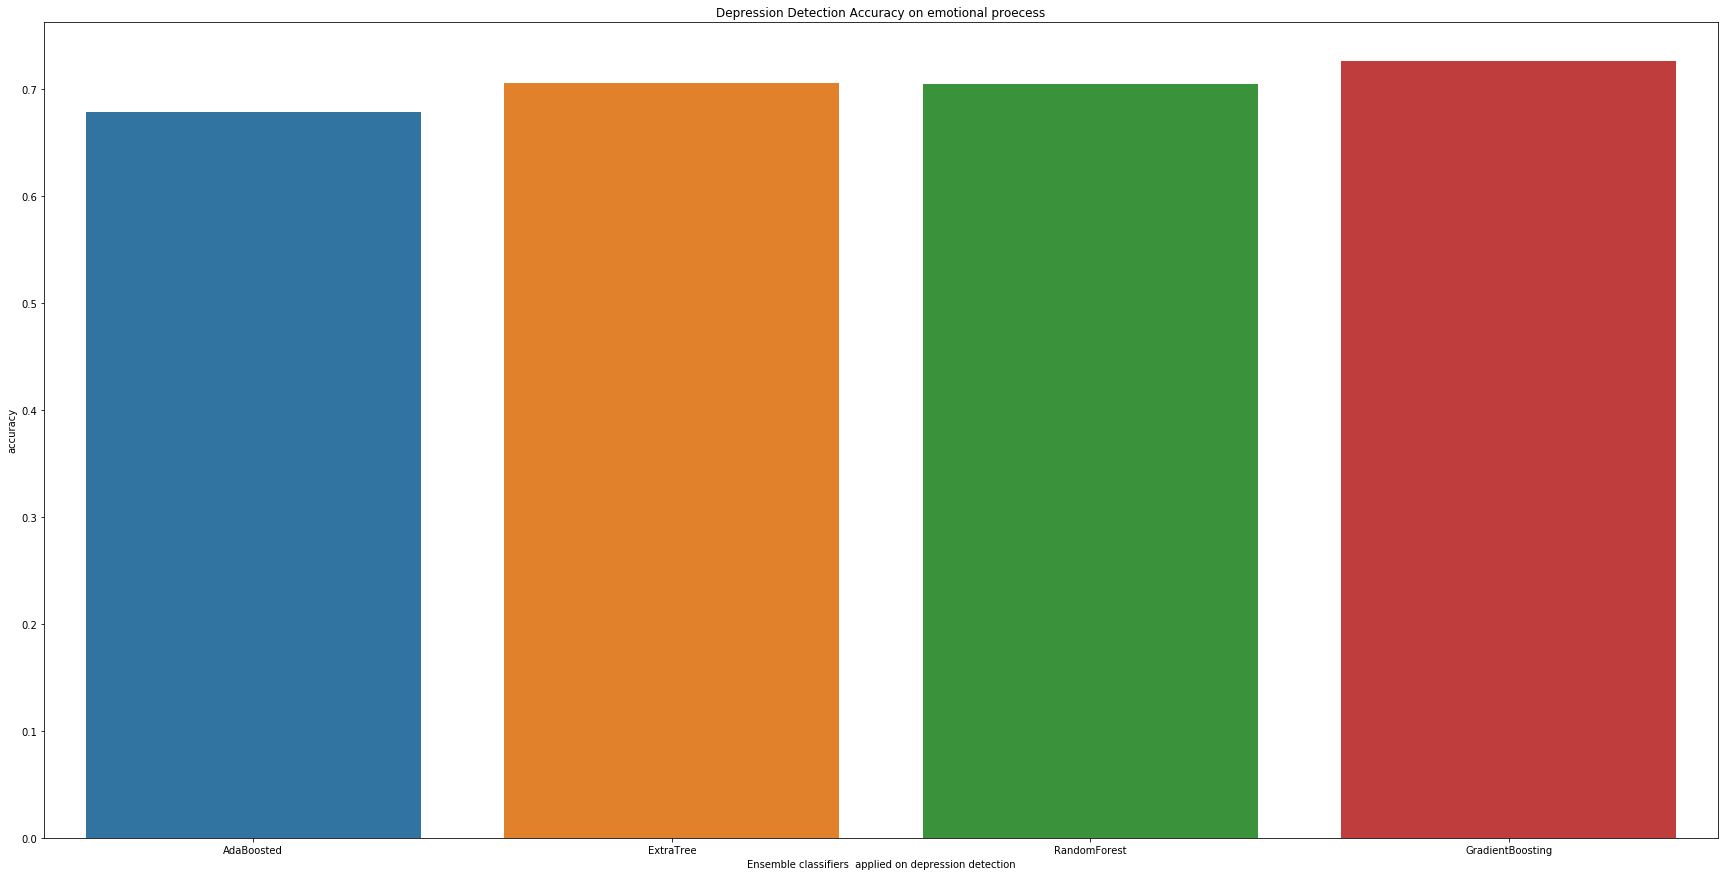

In [21]:

sns.barplot(['AdaBoosted','ExtraTree','RandomForest','GradientBoosting'], 
            [acc1,acc2,acc3,acc4])
plt.title('Depression Detection Accuracy on emotional proecess')
plt.xlabel('Ensemble classifiers  applied on depression detection')
plt.ylabel('accuracy')


Text(0, 0.5, 'accuracy')

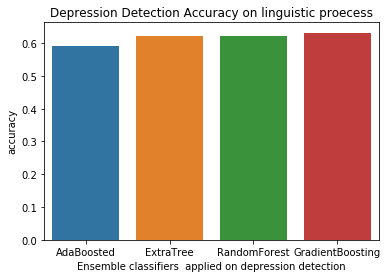

In [122]:
sns.barplot(['AdaBoosted','ExtraTree','RandomForest','GradientBoosting'], 
            [acc5,acc6,acc7,acc8])
plt.title('Depression Detection Accuracy on linguistic proecess')
plt.xlabel('Ensemble classifiers  applied on depression detection')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

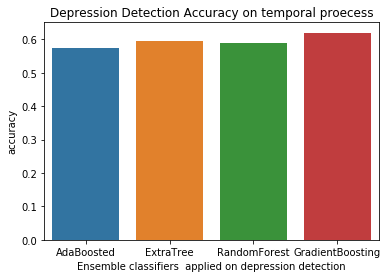

In [72]:
sns.barplot(['AdaBoosted','ExtraTree','RandomForest','GradientBoosting'], 
            [acc9,acc10,acc11,acc12])
plt.title('Depression Detection Accuracy on temporal proecess')
plt.xlabel('Ensemble classifiers  applied on depression detection')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

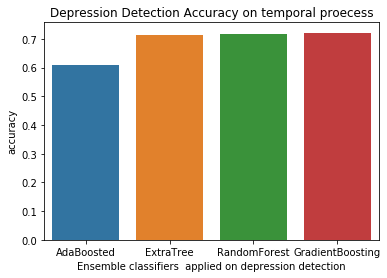

In [118]:
sns.barplot(['AdaBoosted','ExtraTree','RandomForest','GradientBoosting'], 
            [acc13,acc14,acc15,acc16])
plt.title('Depression Detection Accuracy on  proecess')
plt.xlabel('Ensemble classifiers  applied on depression detection')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

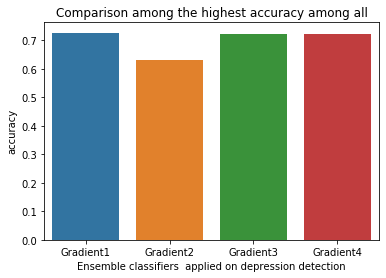

In [120]:
sns.barplot(['Gradient1', 'Gradient2', 'Gradient3', 'Gradient4'], 
            [acc4,acc8,acc12,acc16])
plt.title('Comparison among the highest accuracy among all')
plt.xlabel('Ensemble classifiers  applied on depression detection')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

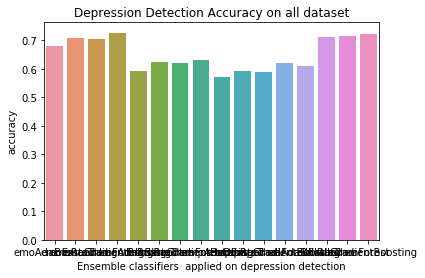

In [73]:
sns.barplot(['emoAdaBoosted' , 'emoExtraTree' , 'emoRandomForest' , 'emoGradientBoosting' , 'lingAdaBoosted' , 'lingExtraTree' , 'lingRandomForest' , 'lingGradientBoosting'
            ,'tempAdaBoosted' , 'tempExtraTree' , 'tempRandomForest' , 'tempGradientBoosting' , 'allAdaBoosted' , 'allExtraTree' , 'allRandomForest' , 'allGradientBoosting'], 
            [acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8,acc9,acc10,acc11,acc12,acc13,acc14,acc15,acc16])
plt.title('Depression Detection Accuracy on all dataset')
plt.xlabel('Ensemble classifiers  applied on depression detection')
plt.ylabel('accuracy')